# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

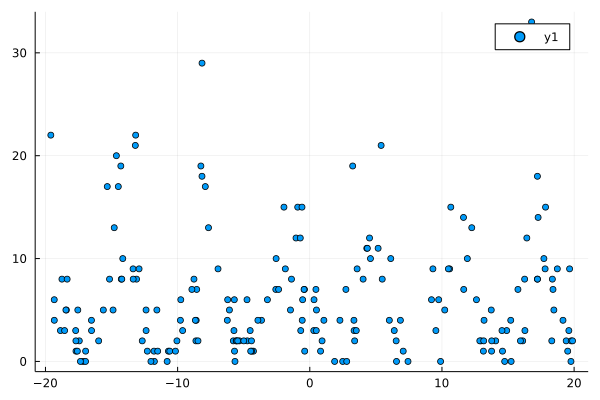

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -560.2154669746751
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.794257 seconds (7.09 M allocations: 457.986 MiB, 10.20% gc time, 97.74% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.4456356950322871, 0.32734352507435255, 0.42782167568426693, 0.21323055637909144, 0.29397161120148574, 0.1938120024918595, 0.2772361419987436, 0.3411727905758659, 0.31150726821735425, 0.7336728277526045  …  0.4975113872584108, 0.36069485119845957, 0.5717525381515507, 0.414093106870746, 0.45007314665514203, 0.2705729848790898, 0.48133497361063105, 0.20091535134784053, 0.17471751651726813, 0.5212596022639151], θ = [8.85395623653586, 6.938156221397477, 12.805279224642076, 3.984912836776928, 3.9714403490956616, 3.489085095998274, 4.471397364995423, 2.9712350561115923, 5.951947839797854, 2.3935836884603616  …  2.9396148054046276, 6.925082413718498, 2.4340506857935873, 2.9578542634799443, 2.9503637594065655, 3.975774095060176, 11.77356140529298, 3.9865984359968314, 3.989855562472642, 2.444890332837965]), opt_state = (NamedTuple(),), hyperopt_state = (Na

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -701.9799350001845
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.457642 seconds (4.68 M allocations: 333.579 MiB, 4.83% gc time, 95.98% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.336964950355119) infered by Analytic Variational Inference , (local_vars = (c = [0.408498653841475, 0.25143839799421963, 0.38021734727302664, 0.1762700864376152, 0.45941607297795367, 0.17479672602278024, 0.39470633901073704, 0.5332822111310107, 0.2337065687459577, 0.8562455189331838  …  0.6757952538315409, 0.30893019440784475, 0.7627545325377985, 0.6096366998372729, 0.6229638751142647, 0.41439217181245214, 0.47863695453294286, 0.2636859147135464, 0.23227600461341544, 0.7093740581077277], θ = [9.067405174342577, 7.482399024567961, 13.082352519654812, 4.879360889752864, 5.409002642864223, 4.421353960820977, 5.775769469490466, 4.539983168044898, 6.557311557774234, 4.271949222428451  …  4.685021162921885, 7.317414536924082, 4.306370798893013, 4.635499024790156, 4.631058913307605, 5.359433358800539, 11.85000406960036, 5.10291091653916, 5.080293501518714, 4.246446750963992], γ = [5.386293148852816, 6.04355622570654, 5.4791570592

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

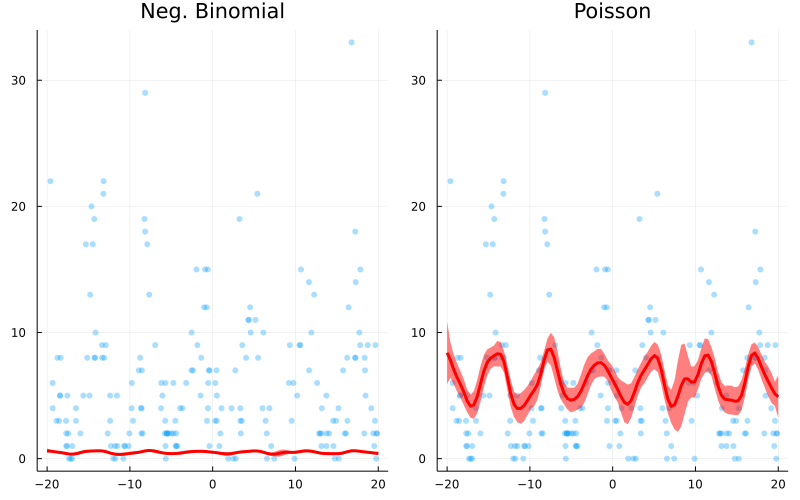

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*